# Analysis of MovieLens (1996-2018)

### Content
+ Motivation
+ Objectives
+ Introduction: MovieLens
+ Data description
+ Formulation of research questions
+ Data preparation
+ Exploratory Data Analysis (EDA) and Data Visualization


# Motivation
* Comprehend the pattern in normal appraisals for various film sorts over years (from 1996 to 2018) and Correlation between the patterns for various genres.
* I think this will give us a knowledge about how individuals' preference for the diverse film genres change over the long run and about the quality of relationship between trends in the various of film kinds, experiences perhaps helpful for the film critics.


# Objectives
* First of all, it is necessary to determine which datasets from the ones presented in the dataset will be used for further data analysis
* Preparation data for analysis
* Answer research questions based on data analysis and visualization.

# 1. Introduction: MovieLens

MovieLens is a recommended movie search service that allows its users to recommend movies based on their preferences. For this reason, a comprehensive filtering of movie reviews and ratings are used. This online platform contains about 11 million ratings for approximately 8,500 films. MovieLens was created in 1997 by the GroupLens Research Laboratory at the University of Minnesota. It was created for the purpose of collecting and further research data based on personal recommendations.

It is worth noting that Movielens is not the first recommendation resource for movies. Earlier in may 1996, GroupLens presented to the world a commercial enterprise - Net Perceptions, which provided its technologies to E! Online to create a recommendation system for Moviefinder.com. 

A key factor in the creation of Movielens was the closure of another movie recommendation site eachmovie.org. After deactivating the site, the creators decided to make publicly available all the rating data they had previously collected, which was used by the GroupLens Research team led by Brent Dahlen and John Herlocker to launch a new recommendation site for movies, which we now know as MovieLens.

MovieLens also provides detailed information about movies, such as a list of actors and film Directors. Users can also submit and rate tags that can be used to improve the accuracy of the movie recommendation system.

Source: https://en.wikipedia.org/wiki/MovieLens




# 2. Data Description

From the description of MovieLens described above, it is obvious that absolutely every movie that is displayed in this recommendation system is included in it based on a number of characteristics. In this project I analyse a dataset which describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018, as it covers the transition period in cinematography, it is also possible to analyze the changing trends and standards of recommended films. Continuing on, we will utilizing the movies.csv and ratings.csv records.
Below is a classification of the data that we will analyze in our analysis:
+ user Id - is a unique identifier for users
+ movie Id - is a unique identifier for movies
+ rating - made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
+ timestamps - represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
+ title - title of a movie
+ genres - genres of the movie



##### Main data types are:
+ int: movieId, userId
+ string: title, genres
+ float: rating

# 3. Formulation of research questions

Before starting the main analysis, you need to create several research questions. Below are 5 research questions that I will try to find answers to during the analysis:

+ What genre of movies is very popular?  

+ What are the average ratings over all movies in each year? 

+ In general, what is a rating of each movie genre?

+ The trend in average appraisals for various film kinds: How the average evaluations for a several of various film kinds change over the long run (various years, from 1996 to 2018)? By what method can the average ratings for various  film classifications be looked at among themselves? 

+ Correlation between the trends for various movie kinds: How are the trend patterns for the genres related? For instance, are the average appraisals for Comedy and Sci-Fi motion pictures emphatically connected with one another? What is the strength of association/reccomendation?

# 4. Data Preparation
### 4.1 Importing the data

To start our analysis now we need to import necessary libraries and modules which we will use later on. 

In [27]:
# import needed modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re
import seaborn as sns


After introducing the main libraries and modules, now we need to load our data files using the pandas

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

### 4.2 Overviewing of the data

We presently want to take a look of the first 5 lines of the data to see the overall design of our variables. The first column is used to represents the indexing term. In Python it starts from 0. 

In [3]:
movies.head(n=5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head(n=5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Now, I want to get an array of all genres. Let us use a lambda function* and a foor loop to add all genre values and then we will choose exactly the unique titles from the list. GL - stands for genre list. NL - (new genre) list.

In [5]:
GL = np.array(movies.genres.transform(lambda x:x.split('|')))
l = []
for i in GL:
    for j in i:l.append(j)
NL = np.unique(l)
print(NL)

['(no genres listed)' 'Action' 'Adventure' 'Animation' 'Children' 'Comedy'
 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


As you remember, we have a timestamp, but the datatype is object firstly we need to change it to integer datatype. Let us only extract years. We will use it in our visualization part. 

In [6]:
ratings = ratings.astype(int)

In [29]:
movies.genres = movies.genres.astype("|S")


In [30]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),b'Adventure|Animation|Children|Comedy|Fantasy',1995
1,2,Jumanji (1995),b'Adventure|Children|Fantasy',1995
2,3,Grumpier Old Men (1995),b'Comedy|Romance',1995
3,4,Waiting to Exhale (1995),b'Comedy|Drama|Romance',1995
4,5,Father of the Bride Part II (1995),b'Comedy',1995


In [9]:
import time
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4,2000
1,1,3,4,2000
2,1,6,4,2000
3,1,47,5,2000
4,1,50,5,2000


Next, we should calculate the average rating over all movies in each year. 

In [10]:
avg_rating_year = ratings[['timestamp','rating']].groupby('timestamp').mean()

In [11]:

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),b'Adventure|Animation|Children|Comedy|Fantasy'
1,2,Jumanji (1995),b'Adventure|Children|Fantasy'
2,3,Grumpier Old Men (1995),b'Comedy|Romance'
3,4,Waiting to Exhale (1995),b'Comedy|Drama|Romance'
4,5,Father of the Bride Part II (1995),b'Comedy'


# 5. Exploratory Data Analysis (EDA) and Data Visualization


Now we extract year from the movie title.

In [14]:
movies['year'] =movies['title'].str.extract('.*\((.*)\).*',expand = False)
movies.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),b'Adventure|Animation|Children|Comedy|Fantasy',1995
1,2,Jumanji (1995),b'Adventure|Children|Fantasy',1995
2,3,Grumpier Old Men (1995),b'Comedy|Romance',1995
3,4,Waiting to Exhale (1995),b'Comedy|Drama|Romance',1995
4,5,Father of the Bride Part II (1995),b'Comedy',1995


Now, it is time for our research questions. As you remember at the begginning I made a lisk of questins. 
### What genre of movies is very popular?


Let us create a function which will counts how many times each genre appear.

In [31]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [24]:
#here we  make census of the genres:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

TypeError: Cannot use .str.split with values of inferred dtype 'bytes'.

In [19]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences

TypeError: Cannot use .str.split with values of inferred dtype 'bytes'.

NameError: name 'trunc_occurences' is not defined

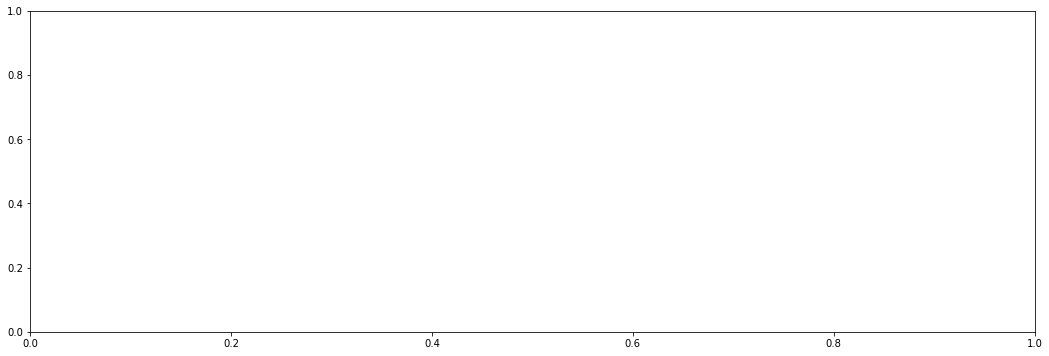

In [28]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

### The second question is: What are the average ratings over all movies in each year?